In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import numpy.random as rng
import pandas_datareader.data as web
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
def get_prices(symbol):
    start, end = '2010-05-02', '2020-06-11'
    data = web.DataReader(symbol, 'yahoo', start, end)
    data=pd.DataFrame(data)
    prices=data['Close']
    #prices=np.asarray(list(prices))
    prices=prices.astype(float)
    return prices

def get_returns(prices):
    return (prices-prices.shift(-1))/prices

def sort_data(rets):
    ins = []
    outs = []
    for i in range(len(rets)-100):
        ins.append(rets[i:i+100].tolist())
        outs.append(rets[i+100])
    return np.array(ins), np.array(outs)

In [12]:

# separate data into inputs and outputs for training and testing
gs = get_prices('GS')
rets = get_returns(gs)
ins, outs = sort_data(rets)
div = int(.8 * ins.shape[0])
train_ins, train_outs = ins[:div], outs[:div]
test_ins, test_outs = ins[div:], outs[div:]


In [13]:
ins.shape

(2446, 100)

## Train the CNN

In [14]:
sess = tf.InteractiveSession()

# we define two placeholders for our input and output
x = tf.placeholder(tf.float32, [None, 100])
y_ = tf.placeholder(tf.float32, [None, 1])

# we define trainable variables for our model
W = tf.Variable(tf.random_normal([100, 1]))
b = tf.Variable(tf.random_normal([1]))

# we define our model: y = W*x + b
y = tf.matmul(x, W) + b

#MSE:
cost = tf.reduce_sum(tf.pow(y-y_, 2))/(2*1000)
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cost)

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
%%time
# initialize variables to random values
init = tf.global_variables_initializer()
sess.run(init)
# run optimizer on entire training data set many times
for epoch in range(20000):
    sess.run(optimizer, feed_dict={x: train_ins, y_: train_outs.reshape(1,-1).T})
    # every 1000 iterations record progress
    if (epoch+1)%1000== 0:
        c = sess.run(cost, feed_dict={x: train_ins, y_: train_outs.reshape(1,-1).T})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))

Epoch: 1000 cost= 0.012776636
Epoch: 2000 cost= 0.007850354
Epoch: 3000 cost= 0.004938475
Epoch: 4000 cost= 0.003186879
Epoch: 5000 cost= 0.002115565
Epoch: 6000 cost= 0.001449974
Epoch: 7000 cost= 0.001030321
Epoch: 8000 cost= 0.000762052
Epoch: 9000 cost= 0.000588321
Epoch: 10000 cost= 0.000474433
Epoch: 11000 cost= 0.000398911
Epoch: 12000 cost= 0.000348283
Epoch: 13000 cost= 0.000313990
Epoch: 14000 cost= 0.000290533
Epoch: 15000 cost= 0.000274338
Epoch: 16000 cost= 0.000263057
Epoch: 17000 cost= 0.000255132
Epoch: 18000 cost= 0.000249520
Epoch: 19000 cost= 0.000245516
Epoch: 20000 cost= 0.000242639
CPU times: user 38.3 s, sys: 3.38 s, total: 41.7 s
Wall time: 19.5 s


## Plot the result

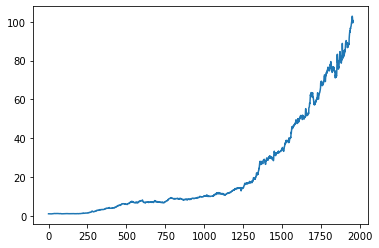

In [16]:
#train results :)
predict = y
p = sess.run(predict, feed_dict={x: train_ins})
position = 2*((p>0)-.5)
returns= position.reshape(-1) * train_outs
plot(np.cumprod(returns+1))

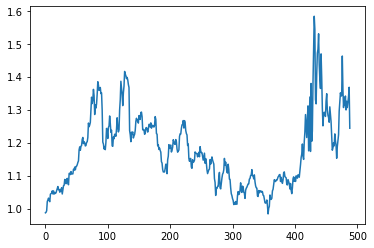

In [17]:
#test results :(
predict = y
p = sess.run(predict, feed_dict={x: test_ins})
position = 2*((p>0)-.5)
returns= position.reshape(-1) * test_outs
plot(np.cumprod(returns+1))